In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
# getting the data

data = fetch_california_housing()

In [4]:
# creating a df from the features

df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
# adding the target variable which is the price

df['MedHouseValue'] = data.target

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# normalising headers' format

df.columns = df.columns.str.lower()
df.columns

Index(['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup',
       'latitude', 'longitude', 'medhousevalue'],
      dtype='object')

<AxesSubplot:xlabel='medhousevalue', ylabel='Count'>

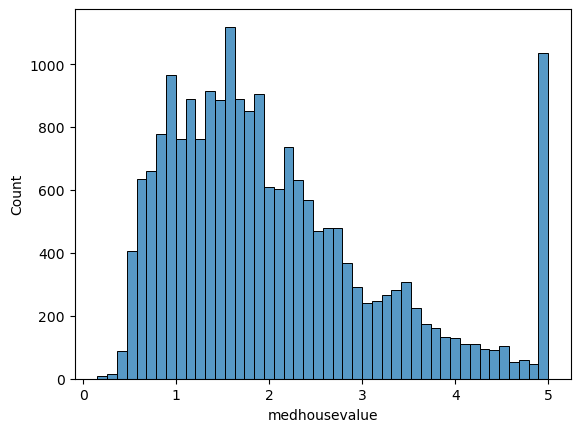

In [8]:
# checking the distribution of my target variable medhousevalue

sns.histplot(df.medhousevalue) 

### Reviewing the histogram

- Skewness : the distribution of medhousevalue appears to be right-skewed, meaning that there are more observations on the lower end of the values, and fewer as the value increases.
- Possible capping at the upper end? : the spike around the value of 5 suggests that the data might be capped or clipped at that point. This could be due to how the data was collected or limited to a maximum value of 5. This “ceiling effect” could affect my model’s performance since values above 5 are not represented accurately.
- Wide range of values: the values of medhousevalue range from 0 to 5, indicating a relatively wide spread in the data.

In [10]:
# applying a logarithmic transformation to help normalize the data

price_logs = np.log1p(df.medhousevalue)
price_logs

0        1.709464
1        1.522790
2        1.508733
3        1.484555
4        1.486592
           ...   
20635    0.577175
20636    0.571544
20637    0.653886
20638    0.613563
20639    0.638691
Name: medhousevalue, Length: 20640, dtype: float64

<AxesSubplot:xlabel='medhousevalue', ylabel='Count'>

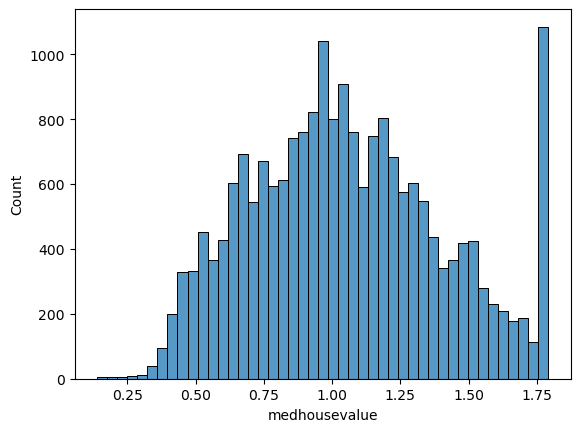

In [11]:
# replotting the histogram

sns.histplot(price_logs)

In [12]:
# locating missing values

df.isnull().sum()

medinc           0
houseage         0
averooms         0
avebedrms        0
population       0
aveoccup         0
latitude         0
longitude        0
medhousevalue    0
dtype: int64

In [13]:
# splitting the df to validation, test and train sets

n = len(df)
n_val = int(len(df) * 0.2) # 20% for validation
n_test =  int(len(df) * 0.2) # 20% for testing
n_train = int(len(df) * 0.6) # 60% for training

In [14]:
# checking if the n matches the sum of n_val, n_test and n_train

n, n_val + n_test + n_train

(20640, 20640)

In [15]:
# setting up index in order to shuffle data

idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [16]:
# creating the dfs based on new index

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head(10)

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude,medhousevalue
10385,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65,2.787
1943,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91,2.076
7490,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23,0.967
16889,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37,3.538
11416,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98,3.905
10297,5.4570,13.0,4.716332,1.041547,1565.0,2.242120,33.92,-117.88,3.088
16843,4.7625,35.0,5.303942,0.994813,3004.0,3.116183,37.63,-122.44,2.813
11528,2.2708,26.0,3.947059,1.080392,664.0,1.301961,33.77,-118.08,0.675
18951,3.8150,37.0,5.783550,1.086580,680.0,2.943723,38.25,-122.05,0.990
3728,3.8906,31.0,4.767258,1.005917,1102.0,2.173570,34.18,-118.43,2.822


In [18]:
# checking the length of the each df

len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [19]:
# resetting the index since it's not necessary

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
# setting y variable (applying logarithmic to prepare the medhousevalue column)

y_train = np.log1p(df_train.medhousevalue.values)
y_val = np.log1p(df_val.medhousevalue.values)
y_test = np.log1p(df_test.medhousevalue.values)

In [21]:
# removing medhousevalue variable from df_train

del df_train['medhousevalue']
del df_val['medhousevalue']
del df_test['medhousevalue']

# Implementing linear regression

In [22]:
# defining feature columns (all columns except the target variable 'medhousevalue')

base = ['medinc', 'houseage', 'averooms', 'avebedrms', 'population', 'aveoccup']
df_train[base]

,medinc,houseage,averooms,avebedrms,population,aveoccup
0,6.4114,15.0,7.527559,1.049869,2529.0,3.318898
1,4.1843,12.0,6.330084,1.041783,2033.0,2.831476
2,1.7411,35.0,5.369159,1.294393,909.0,4.247664
3,3.4412,39.0,4.173405,1.074573,2156.0,1.937107
4,7.8195,16.0,8.602349,1.058725,2142.0,3.593960
...,...,...,...,...,...,...
12379,2.6771,23.0,3.748454,1.076289,958.0,1.975258
12380,2.5568,32.0,3.731935,1.090909,731.0,1.703963
12381,6.2210,52.0,6.571429,0.966667,530.0,2.523810
12382,4.6071,52.0,6.030189,1.075472,689.0,2.600000


In [23]:
# exrtracting the values from the columns

X_train = df_train[base].values
X_train

array([[6.41140000e+00, 1.50000000e+01, 7.52755906e+00, 1.04986877e+00,
        2.52900000e+03, 3.31889764e+00],
       [4.18430000e+00, 1.20000000e+01, 6.33008357e+00, 1.04178273e+00,
        2.03300000e+03, 2.83147632e+00],
       [1.74110000e+00, 3.50000000e+01, 5.36915888e+00, 1.29439252e+00,
        9.09000000e+02, 4.24766355e+00],
       ...,
       [6.22100000e+00, 5.20000000e+01, 6.57142857e+00, 9.66666667e-01,
        5.30000000e+02, 2.52380952e+00],
       [4.60710000e+00, 5.20000000e+01, 6.03018868e+00, 1.07547170e+00,
        6.89000000e+02, 2.60000000e+00],
       [4.63660000e+00, 4.00000000e+01, 5.31176471e+00, 1.02156863e+00,
        1.15600000e+03, 2.26666667e+00]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# training the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# getting the predictions

y_pred_train = model.predict(X_train)
print('Prediction values:', y_pred_train[:10])

Prediction values: [1.25232273 0.94932549 0.80523841 1.13259295 1.40681227 1.28142994
 1.22724064 0.87523804 1.04492826 1.08189783]


<AxesSubplot:ylabel='Count'>

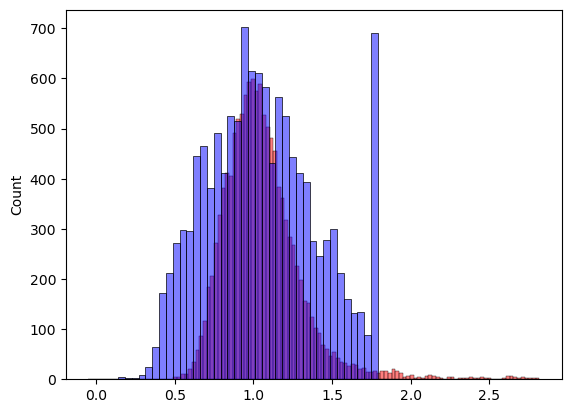

In [27]:
# plotting the predictions to see if they're similar to the target variable medhousevalue i want to predict 

sns.histplot(y_pred_train, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)

In [29]:
# calculating the RMSE to evaluate

from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Training RMSE: {rmse_train}")

Training RMSE: 0.24667046537863047


In [30]:
# adding longitude and latitude variables into the X_train set

base_all = base + ['longitude', 'latitude']
df_train[base_all]

,medinc,houseage,averooms,avebedrms,population,aveoccup,longitude,latitude
0,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,-117.65,33.60
1,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,-120.91,38.62
2,1.7411,35.0,5.369159,1.294393,909.0,4.247664,-118.23,33.93
3,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,-122.37,37.59
4,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,-117.98,33.70
...,...,...,...,...,...,...,...,...
12379,2.6771,23.0,3.748454,1.076289,958.0,1.975258,-117.83,33.74
12380,2.5568,32.0,3.731935,1.090909,731.0,1.703963,-117.25,32.80
12381,6.2210,52.0,6.571429,0.966667,530.0,2.523810,-122.40,37.60
12382,4.6071,52.0,6.030189,1.075472,689.0,2.600000,-122.47,37.75


In [31]:
# re training set with all features including longitude and latitude

X_train_all = df_train[base_all].values

In [32]:
# re implementing linear regression model with all features

model = LinearRegression()
model.fit(X_train_all, y_train)

LinearRegression()

In [33]:
# getting predictions on training set with all features

y_pred_train_all = model.predict(X_train_all)

In [34]:
# calculating RMSE for the X_train_all set

rmse_train_all = np.sqrt(mean_squared_error(y_train, y_pred_train_all))
print(f"Training RMSE with all features: {rmse_train_all}")

Training RMSE with all features: 0.21749466234925535


#### the all features training set is an improvement to the initial Training RMSE: 0.24667046537863047

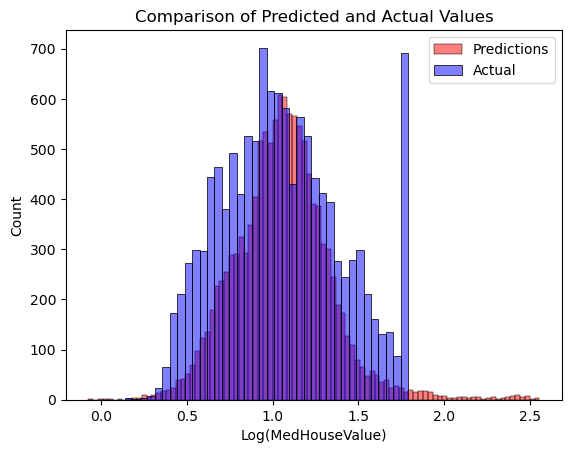

In [36]:
# plotting the predictions of X_train_all to visualise the change vs original values

sns.histplot(y_pred_train_all, color='red', alpha=0.5, label='Predictions')
sns.histplot(y_train, color='blue', alpha=0.5, label='Actual')

# adding labels for clarity

plt.xlabel('Log(MedHouseValue)')
plt.ylabel('Count')
plt.legend()
plt.title('Comparison of Predicted and Actual Values')
plt.show()

### Reviewing the histogram

- After inlcuding geo information the RMSE improved and it looks also on the histogram that the predictions are overlapping the actual values, indicating that the model is doing a decent job of predicting the MedHouseValue.

- There is still some discrepancy, particularly at the right tail (higher values around 2.0+) and the left tail (lower values around 0.0). This suggests that your model might struggle to predict extreme values accurately.

## Validating the model on X_val_all set

In [37]:
# adding all variablesto the set

X_val_all = df_val[base_all].values

In [38]:
# getting predictions from the validation set

y_pred_val_all = model.predict(X_val_all)

In [39]:
# calculating RMSE for the validation set to compare with training set

rmse_val_all = np.sqrt(mean_squared_error(y_val, y_pred_val_all))
print(f"Validation RMSE with all features: {rmse_val_all}")

Validation RMSE with all features: 0.21347423438268526


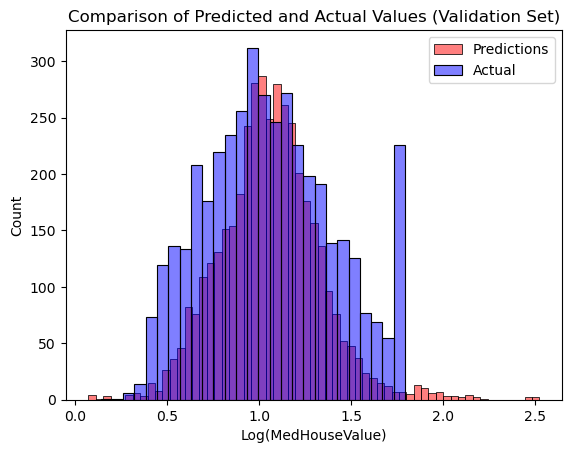

In [40]:
# plotting the predictions of validation set vs actual values to visualise fit

sns.histplot(y_pred_val_all, color='red', alpha=0.5, label='Predictions')
sns.histplot(y_val, color='blue', alpha=0.5, label='Actual')

# Adding labels for clarity
plt.xlabel('Log(MedHouseValue)')
plt.ylabel('Count')
plt.legend()
plt.title('Comparison of Predicted and Actual Values (Validation Set)')
plt.show()

### Reviewing the histogram

- Training RMSE with all features was 0.21749466234925535 and from the validation set 0.21347423438268526 which is very close to the training result. My model is generalising well to unseen data and not overfitting.

- Next step: I will apply Regularisation to see if there will be any improvement to my model.


## Regularisation

a technique to control the weights so they don't grow too much. It prevents overfitting by adding a penalty to the model’s difference between the predicted values from your model and the actual values from the data, the loss function in order to keep model coefficients small and improve generalisation to new data.

### L1 Regularization (Lasso)

adds a penalty equal to the absolute value of the coefficients, which can shrink some coefficients to zero, effectively performing feature selection.

In [41]:
from sklearn.linear_model import Lasso

In [42]:
# re implementing the model adding regularisation parameter alpha

lasso_model = Lasso(alpha=0.1)  # I can experiment later with different values for alpha

In [43]:
# re training the model on the X_train_all

lasso_model.fit(X_train_all, y_train)

Lasso(alpha=0.1)

In [44]:
# making predictions by re training the validation model

y_pred_val_lasso = lasso_model.predict(X_val_all)

In [45]:
# calculating the RMSE for the validation set

rmse_val_lasso = np.sqrt(mean_squared_error(y_val, y_pred_val_lasso))
print(f"Validation RMSE with Lasso Regularization: {rmse_val_lasso}")

Validation RMSE with Lasso Regularization: 0.25817426803775095


### RMSE review

- the validation RMSE increased from 0.213 (without regularization) to 0.258 (with alpha=0.1), it suggests that the level of regularisation may be too strong, causing your model to underfit the data.
- next step i will tune the model by finding an optimal alpha value.

In [48]:
# using the validation set to find the most suitable alpha value

for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    lasso_model = Lasso(alpha=alpha) # defining the Lasso model for each alpha
    lasso_model.fit(X_train_all, y_train) # train the model on the training set
    y_pred_val_lasso = lasso_model.predict(X_val_all) # making predictions on the validation set
    rmse_val_lasso = np.sqrt(mean_squared_error(y_val, y_pred_val_lasso)) # calculating the RMSE for the val set
    print(f"Lasso alpha={alpha}, Validation RMSE: {rmse_val_lasso}")

Lasso alpha=1e-05, Validation RMSE: 0.2134733651804814
Lasso alpha=0.0001, Validation RMSE: 0.21346674489554904
Lasso alpha=0.001, Validation RMSE: 0.21351948331142415
Lasso alpha=0.01, Validation RMSE: 0.21783036927351532
Lasso alpha=0.1, Validation RMSE: 0.25817426803775095
Lasso alpha=1, Validation RMSE: 0.3544309290974806


### Evaluating results

- The Validation RMSE (0.21347 and 0.21346, respectively) is almost identical to the RMSE prior to regularisation.
- As I increased the alpha, the RMSE starts to increase, indicating that the model is being regularised too much, leading to underfitting.
- Since there was not significant impact, L1 regularisation is not adding any value to the model therefore i will try L2 Ridge regularisation.

### L2 Regularization (Ridge)

adds a penalty equal to the square of the coefficients, shrinking them towards zero without making them exactly zero, reducing their impact but keeping all features.

In [51]:
# using the Ridge model to check if there will be any improvement on my model

from sklearn.linear_model import Ridge

# tuning the alpha parameter for L2

for alpha in [0.01, 0.1, 1, 10, 50, 100]:
    ridge_model = Ridge(alpha=alpha)  # defining the Ridge model with L2 regularisation
    ridge_model.fit(X_train_all, y_train)  # training the model
    y_pred_val_ridge = ridge_model.predict(X_val_all)  # making predictions on the validation set
    rmse_val_ridge = np.sqrt(mean_squared_error(y_val, y_pred_val_ridge))  # calculating RMSE
    print(f"Ridge alpha={alpha}, Validation RMSE: {rmse_val_ridge}")

Ridge alpha=0.01, Validation RMSE: 0.21347421806750738
Ridge alpha=0.1, Validation RMSE: 0.2134740716082984
Ridge alpha=1, Validation RMSE: 0.21347264416471376
Ridge alpha=10, Validation RMSE: 0.21346188120170168
Ridge alpha=50, Validation RMSE: 0.21347335784298574
Ridge alpha=100, Validation RMSE: 0.21356992027336014


### Evaluating results

- Alpha = 10: Shows a slight decrease in RMSE (0.213461 from 0.2134742), indicating that moderate regularization helps the model generalize slightly better. However the improvement is minimal.

In [54]:
# fine tuning around value 10 to see if there is any improvement

for alpha in [10, 12, 15, 20, 30]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_all, y_train)
    y_pred_val_ridge = ridge_model.predict(X_val_all)
    rmse_val_ridge = np.sqrt(mean_squared_error(y_val, y_pred_val_ridge))
    print(f"Ridge alpha={alpha}, Validation RMSE: {rmse_val_ridge}")

Ridge alpha=10, Validation RMSE: 0.21346188120170168
Ridge alpha=12, Validation RMSE: 0.21346029992962
Ridge alpha=15, Validation RMSE: 0.21345843835927858
Ridge alpha=20, Validation RMSE: 0.21345662298487628
Ridge alpha=30, Validation RMSE: 0.21345736544819582


### Evaluating results

- Again small decrease in RMSE from increasing alpha further suggests that L2 regularisation helps slightly with generalisation, but the effect is very minimal.
- Best alpha value = 20

## Training final model (train and val sets combined)

Before applying the model to the test set, I will combine both the training and validation sets to train the final model. This will allow the model to learn from as much data as possible before I can evaluate on the test set.

In [57]:
# combining training and validation data

df_full_train = pd.concat([df_train, df_val])

In [58]:
# resetting index

df_full_train = df_full_train.reset_index(drop=True)

In [59]:
# checking outcome

df_full_train

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,6.4114,15.0,7.527559,1.049869,2529.0,3.318898,33.60,-117.65
1,4.1843,12.0,6.330084,1.041783,2033.0,2.831476,38.62,-120.91
2,1.7411,35.0,5.369159,1.294393,909.0,4.247664,33.93,-118.23
3,3.4412,39.0,4.173405,1.074573,2156.0,1.937107,37.59,-122.37
4,7.8195,16.0,8.602349,1.058725,2142.0,3.593960,33.70,-117.98
...,...,...,...,...,...,...,...,...
16507,3.0598,13.0,4.310056,1.069832,776.0,2.167598,34.04,-117.67
16508,6.8089,5.0,7.191667,0.975000,1109.0,3.080556,33.88,-117.44
16509,4.6417,17.0,6.829201,1.074380,1219.0,3.358127,34.69,-118.12
16510,1.5281,29.0,5.095890,1.095890,1137.0,3.115068,39.29,-121.68


In [64]:
# using `base_all` to select the feature columns for the combined dataset

X_full_train = df_full_train[base_all].values
X_full_train

array([[   6.4114    ,   15.        ,    7.52755906, ...,    3.31889764,
        -117.65      ,   33.6       ],
       [   4.1843    ,   12.        ,    6.33008357, ...,    2.83147632,
        -120.91      ,   38.62      ],
       [   1.7411    ,   35.        ,    5.36915888, ...,    4.24766355,
        -118.23      ,   33.93      ],
       ...,
       [   4.6417    ,   17.        ,    6.8292011 , ...,    3.35812672,
        -118.12      ,   34.69      ],
       [   1.5281    ,   29.        ,    5.09589041, ...,    3.11506849,
        -121.68      ,   39.29      ],
       [   5.0824    ,   23.        ,    5.50894855, ...,    2.82997763,
        -121.97      ,   37.52      ]])

In [63]:
# combining target values for y

y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([1.33157415, 1.12363005, 0.67650954, ..., 0.8140365 , 0.47995396,
       1.19664603])

In [65]:
# training the model

final_ridge_model = Ridge(alpha=20)
final_ridge_model.fit(X_full_train, y_full_train)

Ridge(alpha=20)

In [67]:
# making predictions on the combined training set

y_pred_full_train = final_ridge_model.predict(X_full_train)
y_pred_full_train

array([1.29220455, 0.75509567, 0.89935817, ..., 0.99294426, 0.51881726,
       1.28285386])

In [68]:
# calculating RMSE for the combined training set

rmse_full_train = np.sqrt(mean_squared_error(y_full_train, y_pred_full_train))
print(f"Training RMSE with Ridge Regularization (alpha=20): {rmse_full_train}")

Training RMSE with Ridge Regularization (alpha=20): 0.21647988391810136


### Evaluating results

- The increase in training RMSE after combining df_train and df_val means that the model is finding it slightly harder to fit the combined set perfectly. This is somewhat expected because adding more data (especially validation data) increases the variability and complexity the model needs to learn.
- However, the difference between 0.2134 and 0.2165 is very small, so the underfitting is minimal and not a concern as long as it translates to better performance on the test set.
- Next step: evaluate on the test set.

## Using the model to predict prices

In [69]:
# getting a random sample of rows from the test set to predict prices

num_samples = 10  # just an arbitrary number
df_test_sample = df_test.sample(n=num_samples, random_state=1)  # random_state for reproducibility

In [70]:
# preparing variables for the sample

X_test_sample = df_test_sample[base_all].values

In [72]:
# predicting prices for the sample

y_pred_sample = final_ridge_model.predict(X_test_sample)
y_pred_sample

array([0.92145933, 1.10776121, 0.98990173, 1.08501201, 1.11306897,
       1.15587923, 0.92740998, 1.44960335, 1.34643066, 0.93531898])

In [75]:
# reversing the logarithmic transformation for predicted and actual prices

y_pred_sample = np.expm1(y_pred_sample) 
y_actual_sample = np.expm1(y_test[:num_samples])

In [76]:
# Compare predicted and actual prices
comparison = pd.DataFrame({
    'Actual Price': y_actual_sample,
    'Predicted Price': y_pred_sample
})

print(comparison)

   Actual Price  Predicted Price
0       0.55800         1.512955
1       1.40800         2.027573
2       0.94400         1.690970
3       5.00001         1.959475
4       1.90600         2.043685
5       0.81300         2.176815
6       2.35200         1.527953
7       2.33800         3.261424
8       2.22800         2.843682
9       3.93200         1.548026


### Evaluating results

- The model tends to underestimate very high house prices (like Actual = 5.00001 vs Predicted = 1.959475), which is a form of systematic underfitting for extreme values.
- However, for lower to moderate price values, the model often overestimates (e.g., Actual = 0.55800 vs. Predicted = 1.512955). This means that for most of the data, the predicted values are generally higher than the actual values, except at the extreme high end.
- Next step: understanding the importance and direction of each variable in predicting the target variable (medhousevalue).

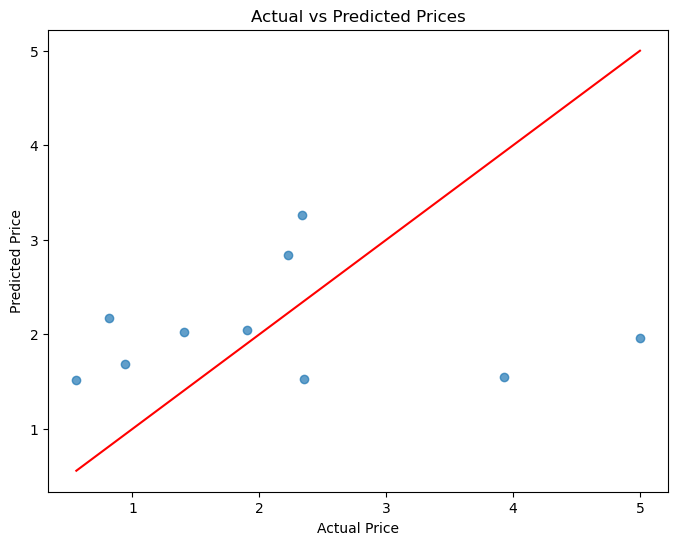

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_sample, y_pred_sample, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_actual_sample.min(), y_actual_sample.max()], [y_actual_sample.min(), y_actual_sample.max()], color='red')  # 45-degree line
plt.show()

In [79]:
# checking Ridge coefficients in order to understand the importance and direction of each variable to predict the house prices

ridge_coefficients = pd.Series(final_ridge_model.coef_, index=base_all)
print(ridge_coefficients.sort_values(ascending=False))

avebedrms     0.230195
medinc        0.127994
houseage      0.002153
population    0.000004
aveoccup     -0.001016
averooms     -0.032524
latitude     -0.163896
longitude    -0.166071
dtype: float64


### Review

- avebedrms (0.230195): The average number of bedrooms has the largest positive influence on house prices. A unit increase in avebedrms is associated with a significant increase in the predicted log house price.
- medinc (0.127994): Median income also positively affects house prices, indicating that wealthier areas generally have higher house prices.
- latitude (-0.163896) and longitude (-0.166071): Both coefficients are negative, suggesting that certain geographic regions have lower house prices.

## Standarising the variables

since not all feature contribute the same to the model by standarising them can help regularization to be more effective

In [80]:
from sklearn.preprocessing import StandardScaler

# standardising the variables
scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_val_all_scaled = scaler.transform(X_val_all)


In [81]:
# re training the model on standardised data

ridge_model = Ridge(alpha=20)  # using the best alpha from previous tuning
ridge_model.fit(X_train_all_scaled, y_train)

Ridge(alpha=20)

In [82]:
# making predictions on the validation set using the standardised data

y_pred_val_ridge_scaled = ridge_model.predict(X_val_all_scaled)

In [83]:
# calculating RMSE for the standardised validation set

rmse_val_ridge_scaled = np.sqrt(mean_squared_error(y_val, y_pred_val_ridge_scaled))
print(f"Validation RMSE with Ridge Regularization on Scaled Data (alpha=20): {rmse_val_ridge_scaled}")

Validation RMSE with Ridge Regularization on Scaled Data (alpha=20): 0.2134803156275707


In [84]:
# reviewing the coefficients of the ridge model on standardised data

ridge_coefficients_scaled = pd.Series(ridge_model.coef_, index=base_all)
print(ridge_coefficients_scaled.sort_values(ascending=False))

medinc        0.246287
avebedrms     0.102394
houseage      0.027386
population    0.003876
aveoccup     -0.012559
averooms     -0.083539
longitude    -0.327432
latitude     -0.343337
dtype: float64


### Reviewing

- The validation RMSE after standardisation with Ridge regularisation is 0.2134803, which is very similar to the previous RMSE obtained before standardisation (0.2134566 with alpha=20).
- This suggests that standardisation did not significantly improve or worsen the model’s performance on the validation set. Standardisation generally helps when features are on very different scales, but since the features in this case are not drastically different in scale (e.g., income, rooms, latitude, etc.), the effect is minimal.
- 	medinc (Median Income) has the highest positive coefficient, suggesting it is the most influential variable on predicting house prices.
- avebedrms (Average Bedrooms per Unit) is the second most influential positive feature.
- longitude and latitude still have the largest negative coefficients, indicating that geography is an important factor in predicting house prices but in a different manner compared to income and bedrooms. These geographic variables might be capturing regional price differences.
- Other features like population, averooms (Average Rooms per Unit), and aveoccup have smaller magnitudes, indicating they play a less significant role.

## Evaluating on the test set and making new predictions

In [85]:
# standardising the combined training set (df_full_train)

X_full_train_scaled = scaler.fit_transform(X_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [86]:
# re training the Ridge model on the combined training set

final_ridge_model_scaled = Ridge(alpha=20)
final_ridge_model_scaled.fit(X_full_train_scaled, y_full_train)

Ridge(alpha=20)

In [87]:
# standardising the test set

X_test_all_scaled = scaler.transform(df_test[base_all].values)

In [88]:
# making predictions on the test set

y_pred_test_scaled = final_ridge_model_scaled.predict(X_test_all_scaled)

In [89]:
# calculating RMSE for the test set

rmse_test_scaled = np.sqrt(mean_squared_error(y_test, y_pred_test_scaled))
print(f"Test RMSE with Ridge Regularization on Scaled Data (alpha=20): {rmse_test_scaled}")

Test RMSE with Ridge Regularization on Scaled Data (alpha=20): 0.23052783097811047


In [90]:
# randomly selecting some samples from the test set

num_samples = 10 
df_test_sample = df_test.sample(n=num_samples, random_state=1)  # random_state for reproducibility

In [91]:
# standardising the selected test samples

X_test_sample_scaled = scaler.transform(df_test_sample[base_all].values)

In [92]:
# predicting prices for the selected samples

y_pred_sample_scaled = final_ridge_model_scaled.predict(X_test_sample_scaled)

In [93]:
# reversing the logarithmic transformation for predicted and actual prices

y_pred_sample_actual = np.expm1(y_pred_sample_scaled)
y_actual_sample = np.expm1(y_test[df_test_sample.index])

In [94]:
# comparing predicted and actual prices
comparison = pd.DataFrame({
    'Actual Price': y_actual_sample,
    'Predicted Price': y_pred_sample_actual
})

print(comparison)

   Actual Price  Predicted Price
0         1.228         1.514009
1         2.932         2.022592
2         1.846         1.691507
3         1.980         1.959156
4         2.259         2.029002
5         3.184         2.172975
6         1.792         1.534520
7         4.050         3.252926
8         2.675         2.828816
9         1.064         1.541472


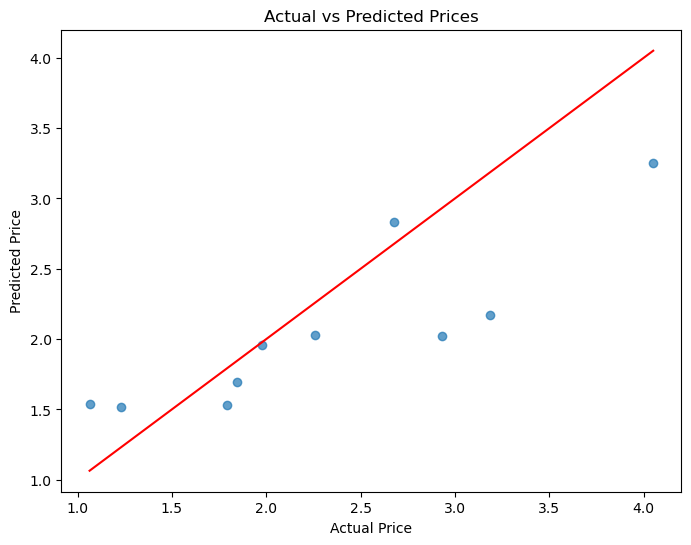

In [95]:
# visualise predictions vs actual prices

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_sample, y_pred_sample_actual, alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_actual_sample.min(), y_actual_sample.max()], [y_actual_sample.min(), y_actual_sample.max()], color='red')  # 45-degree line
plt.show()

## Review

- The test RMSE of 0.2305 is slightly higher than the validation RMSE but still within an acceptable range, meaning the model is consistent.
- Standardising the variables seems to have helped stabilise the coefficients, allowing the model to be more balanced in how it considers each variable.
- Next step: exploring the interactions between the two most positive coeficients medinc and avebedrms in order to check how these two variables together impact the target variable, price.